In [1]:
import os
os.chdir("..")
os.chdir("../src")
from tool_preprocess import preprocesing_function_paraforest
os.chdir("../data")
import pandas as pd
df = pd.read_csv("quejas-clientes-limpio.csv", low_memory=False)


c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d

In [2]:
def semanal (dia):
    match dia:
        case "Monday":
            return 0
        case "Tuesday":
            return 1
        case "Wednesday":
            return 2
        case "Thursday":
            return 3
        case "Friday":
            return 4
        case "Saturday":
            return 5
        case "Sunday":
            return 6

In [3]:
df["weekday"]=df["weekday"].apply(semanal)
df["weekday"]

0        3
1        3
2        3
3        3
4        3
        ..
28151    3
28152    3
28153    3
28154    3
28155    3
Name: weekday, Length: 28156, dtype: int64

In [4]:
df

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?,dias de retraso,weekday
0,1291006,Debt collection,Unknown or not specified,Communication tactics,Frequent or repeated calls,TX,76119,2015-03-19,2015-03-19,"Premium Asset Services, LLC",In progress,Yes,Unknown or not specified,0 days,3
1,1290580,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,TX,77479,2015-03-19,2015-03-19,Accounts Receivable Consultants Inc.,Closed with explanation,Yes,Unknown or not specified,0 days,3
2,1290564,Mortgage,FHA mortgage,"Application, originator, mortgage broker",Unknown or not specified,MA,2127,2015-03-19,2015-03-19,RBS Citizens,Closed with explanation,Yes,Yes,0 days,3
3,1291615,Credit card,Unknown or not specified,Other,Unknown or not specified,CA,92592,2015-03-19,2015-03-19,Navy FCU,In progress,Yes,Unknown or not specified,0 days,3
4,1292165,Debt collection,Non-federal student loan,Cont'd attempts collect debt not owed,Debt resulted from identity theft,OH,43068,2015-03-19,2015-03-19,Transworld Systems Inc.,In progress,Yes,Unknown or not specified,0 days,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28151,1178184,Debt collection,Unknown or not specified,Cont'd attempts collect debt not owed,Debt is not mine,TX,75201,2015-01-01,2015-01-01,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,No,0 days,3
28152,1178183,Consumer loan,Vehicle loan,Taking out the loan or lease,Unknown or not specified,GA,30043,2015-01-01,2015-01-01,DriveTime,Closed with explanation,Yes,Unknown or not specified,0 days,3
28153,1178182,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",Unknown or not specified,MN,55105,2015-01-01,2015-01-01,Regions,Closed with non-monetary relief,Yes,No,0 days,3
28154,1178181,Payday loan,Unknown or not specified,Can't stop charges to bank account,Unknown or not specified,CA,92509,2015-01-01,2015-01-01,Moneytree Inc,Closed with explanation,Yes,Unknown or not specified,0 days,3


In [5]:
df["Consumer disputed?"].fillna("unknown", inplace=True)

C:\Users\unaif\AppData\Local\Temp\ipykernel_4136\1677353787.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Consumer disputed?"].fillna("unknown", inplace=True)


In [6]:
df["Consumer disputed?"].unique()

array(['Unknown or not specified', 'Yes', 'No'], dtype=object)

In [7]:
df=df.drop(columns=["Company"])
df=df[df["Company response"]!="In progress"]
df=df[df["Consumer disputed?"]!="unknown"]

In [8]:
df["Consumer disputed?"].unique()

array(['Unknown or not specified', 'Yes', 'No'], dtype=object)

In [9]:
df_processed = preprocesing_function_paraforest(df)
df_processed.head()

c:\Users\unaif\OneDrive\Documentos\Documentos_Clase_Data\PROYECTOS\nombre_proyecto_final_ML\Projecto-Final-ML\src\tool_preprocess.py:321: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ZIP code"].fillna(000, inplace=True)
c:\Users\unaif\OneDrive\Documentos\Documentos_Clase_Data\PROYECTOS\nombre_proyecto_final_ML\Projecto-Final-ML\src\tool_preprocess.py:324: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0.

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company response,Timely response?,Consumer disputed?,dias de retraso,weekday
1,1290580,4,21,24,11,50,77479,2015-03-19,2015-03-19,1,1,1,0 days,3
2,1290564,6,11,7,45,23,2127,2015-03-19,2015-03-19,1,1,2,0 days,3
6,1288848,1,19,60,45,40,44241,2015-03-18,2015-03-18,1,1,2,0 days,2
7,1288788,4,31,23,6,7,95124,2015-03-18,2015-03-18,1,1,1,0 days,2
8,1288324,4,26,24,14,36,7067,2015-03-18,2015-03-18,3,1,1,0 days,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25466 entries, 1 to 28155
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Complaint ID          25466 non-null  int64 
 1   Product               25466 non-null  object
 2   Sub-product           25466 non-null  object
 3   Issue                 25466 non-null  object
 4   Sub-issue             25466 non-null  object
 5   State                 25466 non-null  object
 6   ZIP code              25466 non-null  int64 
 7   Date received         25466 non-null  object
 8   Date sent to company  25466 non-null  object
 9   Company response      25466 non-null  object
 10  Timely response?      25466 non-null  object
 11  Consumer disputed?    25466 non-null  object
 12  dias de retraso       25466 non-null  object
 13  weekday               25466 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 2.9+ MB


In [11]:
X=df_processed.drop(columns=["Complaint ID", "Consumer disputed?", "ZIP code","Date received"	,"Date sent to company", "dias de retraso"])

In [12]:
y=df_processed["Consumer disputed?"]

In [13]:
from imblearn.over_sampling import ADASYN

In [14]:
"""X_resampled, y_resampled = ADASYN().fit_resample(X, y)"""

'X_resampled, y_resampled = ADASYN().fit_resample(X, y)'

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 24)

In [16]:
X_train

,Product,Sub-product,Issue,Sub-issue,State,Company response,Timely response?,weekday
9509,3,39,49,0,52,1,1,4
11000,4,39,23,15,38,1,1,2
26275,6,11,55,45,8,1,1,1
26,3,39,49,1,27,1,1,1
2298,2,39,13,45,6,1,1,1
...,...,...,...,...,...,...,...,...
22522,4,26,24,11,12,1,1,3
27608,6,28,54,45,32,1,1,4
16992,4,26,37,24,39,1,1,2
1147,3,39,49,0,50,1,1,5


In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
tree_class1=DecisionTreeClassifier( random_state=24)

In [19]:
range(1,15)

range(1, 15)

In [20]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "criterion": ["gini", "entropy"],
    "max_depth":list(range(1,60)), 
    "min_samples_leaf":list(range(1,15)),

}

tree_class = GridSearchCV(estimator = tree_class1,
                  param_grid = parameters,
                  n_jobs = -1,
                  cv = 10,
                  scoring="accuracy", 
                  refit=True)

In [21]:

tree_class.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=24),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14]},
             scoring='accuracy')

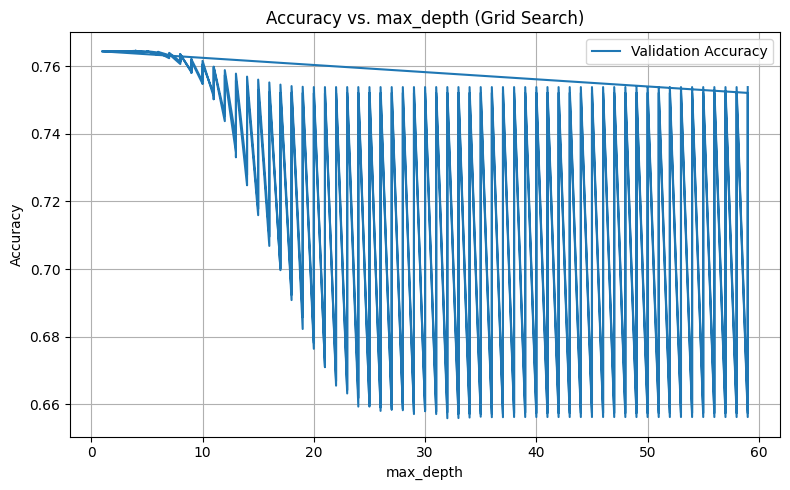

0.7641861094771265
0.0005985495707621099


In [23]:

results = pd.DataFrame(tree_class.cv_results_)
results
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(results['param_max_depth'], results['mean_test_score'],  label='Validation Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. max_depth (Grid Search)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
from sklearn.model_selection import cross_validate
cross_val=cross_validate(tree_class, X_train, y_train, cv=10)["test_score"]

print(cross_val.mean())
print(cross_val.std())

In [24]:
tree_class_def=DecisionTreeClassifier(**tree_class.best_params_)

In [25]:
tree_class_def.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = (tree_class_def.predict_proba(X_test)[:, 1] >= 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred, normalize='true'))


Accuracy: 0.7634471927758146
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       231
           1       0.76      1.00      0.87      3889
           2       0.00      0.00      0.00       974

    accuracy                           0.76      5094
   macro avg       0.25      0.33      0.29      5094
weighted avg       0.58      0.76      0.66      5094

Confusion Matrix:
[[0.         1.         0.        ]
 [0.         1.         0.        ]
 [0.00102669 0.99897331 0.        ]]


c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [27]:
from sklearn.model_selection import cross_validate
cross_val=cross_validate(tree_class_def, X_train, y_train, cv=10)["test_score"]

print(cross_val.mean())
print(cross_val.std())

0.7645297520888104
0.00021433084981217342


In [28]:
feature_names = X_train.columns  # si X_train es un DataFrame
# Si no tienes nombres, puedes usar por defecto: feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]

# Obtener importancia
importances = tree_class_def.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

            Feature  Importance
5  Company response    0.423241
7           weekday    0.193472
3         Sub-issue    0.120205
6  Timely response?    0.105563
4             State    0.072631
0           Product    0.050691
2             Issue    0.034197
1       Sub-product    0.000000


In [29]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(100, 100))
plot_tree(tree_class_def, feature_names=feature_names, filled=True, fontsize=20)

[Text(0.5089285714285714, 0.9, 'Company response <= 1.5\ngini = 0.379\nsamples = 20372\nvalue = [1067, 15571, 3734]'),
 Text(0.2857142857142857, 0.7, 'weekday <= 4.5\ngini = 0.4\nsamples = 15935\nvalue = [803, 11882, 3250]'),
 Text(0.39732142857142855, 0.8, 'True  '),
 Text(0.14285714285714285, 0.5, 'Sub-issue <= 0.5\ngini = 0.388\nsamples = 14160\nvalue = [667, 10694, 2799]'),
 Text(0.07142857142857142, 0.3, 'State <= 43.5\ngini = 0.265\nsamples = 811\nvalue = [28.0, 688.0, 95.0]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.312\nsamples = 540\nvalue = [26, 441, 73]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.163\nsamples = 271\nvalue = [2, 247, 22]'),
 Text(0.21428571428571427, 0.3, 'Product <= 3.5\ngini = 0.395\nsamples = 13349\nvalue = [639, 10006, 2704]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.422\nsamples = 5045\nvalue = [290.0, 3666.0, 1089.0]'),
 Text(0.25, 0.1, 'gini = 0.377\nsamples = 8304\nvalue = [349, 6340, 1615]'),
 Text(0.42857142857142855, 0.5, 'State <= 6.5\ngini =

In [ ]:
---

In [32]:
import os 
import pickle
os.chdir("../models")

with open('modelo_dispute_tree', 'wb') as f:
    pickle.dump(tree_class_def, f)

In [ ]:
"""import os 
import pickle
os.chdir("../models")
import pickle

# Cargar el archivo .pkl
with open('modelo_dispute_tree', 'rb') as f:
    objeto = pickle.load(f)"""

FileNotFoundError: [Errno 2] No such file or directory: 'modelo_dispute_tree'

In [ ]:
objeto.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Timely response?
